# Machine Learning Classifier - Poisonous Mushrooms

- **Author**: Aaron Gillespie  
- **Date**: 2025-04-01
- **Objective**: 
  - build a classifier using machine learning
  - present the classifier & demonstrate understanding of underlying concepts
  - document the process
  - submit as NW Missouri University CSIS 44-670 midterm

We have a dataset about mushrooms, some of which are safe, others not.  
Our goal is to build a machine learning **classifier** capable of predicting whether or not mushrooms are poisonous.

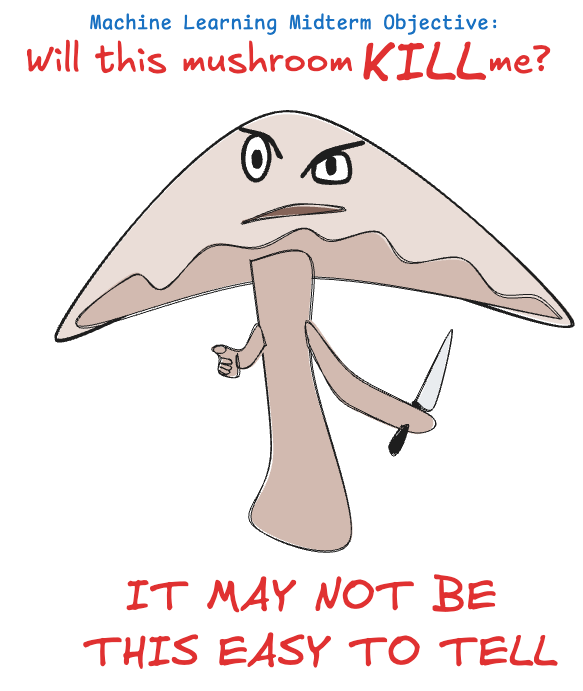

> [!warning] Disclaimer:
> This work should not be used in determining whether or not you should eat a mushroom you find. Just don't.

## Section 1: Import & Inspect the Data

The first thing to do in any exploratory data analysis project - import the data & start to familiarize yourself with it.

Before we can import data, as customary we import the Python packages we'll be working with:

In [705]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

Loading the data from the UC Irvine dataset:

In [706]:
# Inspected "data" file reveals it's a CSV file with no header or index
df = pd.read_csv("data/raw/agaricus-lepiota.data", sep=",", header=None)

# Inspect the raw data
print("Head:")
print(df.head())

# Gather info about the columns
print("Info:")
print(df.info())

Head:
  0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  e  e  s  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  e  c  s  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  e  c  s  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  e  e  s  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  t  e  s  s  w  w  p  w  o  e  n  a  g
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-n

The data are **all** non-numeric. Every column contains exactly 8124 entries. Per the documentation file associated with the dataset (see: agaricus-lepiota.names) the only column with some unknowns is column 11.

The dataset right now is missing headers, and full of codes, which make it difficult to interpret. We will fix that in two steps:

1. Adding headers
2. Translating single-letter codes into the words the represent

In [707]:
# Define the headers as a list
headers = [
    'poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]
# Assign the headers to the DataFrame
df.columns = headers

# Check the updated DataFrame
# Force pandas to display all columns without truncation
pd.set_option('display.max_columns', None)
print(df.head())

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1             

In [708]:
# The function from your earlier request (slightly updated to handle the "poisonous" column too)
def get_word_from_code(row, code):
    feature_descriptions = {
        'poisonous': {'e': 'edible', 'p': 'poisonous'},
        'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
        'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
        'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
        'bruises': {'t': 'bruises', 'f': 'no'},
        'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
        'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
        'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
        'gill-size': {'b': 'broad', 'n': 'narrow'},
        'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
        'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
        'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
        'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
        'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
        'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
        'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
        'veil-type': {'p': 'partial', 'u': 'universal'},
        'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
        'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
        'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
        'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
        'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
        'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
    }

    # Normalize feature name (convert to lowercase and remove spaces to match keys)
    feature = row.lower().replace(" ", "-")
    
    # Check if feature exists in the dictionary and return the corresponding word for the code
    if feature in feature_descriptions and code in feature_descriptions[feature]:
        return feature_descriptions[feature][code]
    else:
        return None  # Return None if the feature or code is not found

# Apply the function to the DataFrame
for column in df.columns:
    df[column] = df[column].apply(lambda x: get_word_from_code(column, x))

# Check the updated DataFrame
print(df.head())
print(df.info())

   poisonous cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            free        close    narrow      black   enlarging      equal   
1            free        close     broad      black   enlarging       club   
2            free        close     broad      brown   enlarging       club   
3            free        close    narrow      brown   enlarging      equal   
4            free      crowded     broad      black    tapering      equal   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                   smooth                   smooth     

Much better. From here I'm going to save the DataFrame out to CSV, as we've added value through translation and created what could be a useful intermediate dataset. 

In [709]:
#save to csv
df.to_csv("data/processed/translated_mushroom_data.csv", index=False)

### Reflection 1:

> Reflection 1: What do you notice about the dataset? Are there any data issues?

The raw data are presented as a dead simple CSV file. Without the associated documentation file that describes the contents of the `.data` CSV, it would be indecipherable. As such, this makes it almost actively hostile to work with in its raw form. Luckily the documentation was robust and it was not difficult to translate the raw data into a more human-friendly form, complete with headers & full words in the place of single-character codes.

While there are no `NaN` values amongst the data - there **are** 2,480 rows with missing _stalk-root_ information. My judgement suggests the right course of action to take here is to leave the `missing` values in place, and **only** remove those rows if the model even considers the _stalk-root_ column. There is no obvious method of interpolating correct values, and the quantity of `missing` values is too significant to simply throw out those rows. Luckily there are 21 other candidate features that I expect we'll be able to use successfully.

Another potential (at this point) issue is that **all features are currently categorical data**. Some of the machine learning algorithms we've used thus far _require_ numerical data. Luckily it's not too difficult to encode categoircal values as numbers.

## Section 2: Data Exploration & Preparation

Some of the prep work has already been done, but let's explore and make sure there isn't additional things we would benefit from doing.

### 2.1 Explore Patterns & Distributions

To explore patterns and trends in the underlying data, we'll utilize a variety of charts and techniques.

#### Overview of All Distributions - Stacked Bar Chart

Because all data are categorical, there is no chance to do pairwise comparison tables that give a good "overall feel" for the distribution and correlations of the data. While the following Stacked Bar Chart says nothing about correlations, it does give a good overall picture of the _distribution_ of the categories in each of the feature columns.

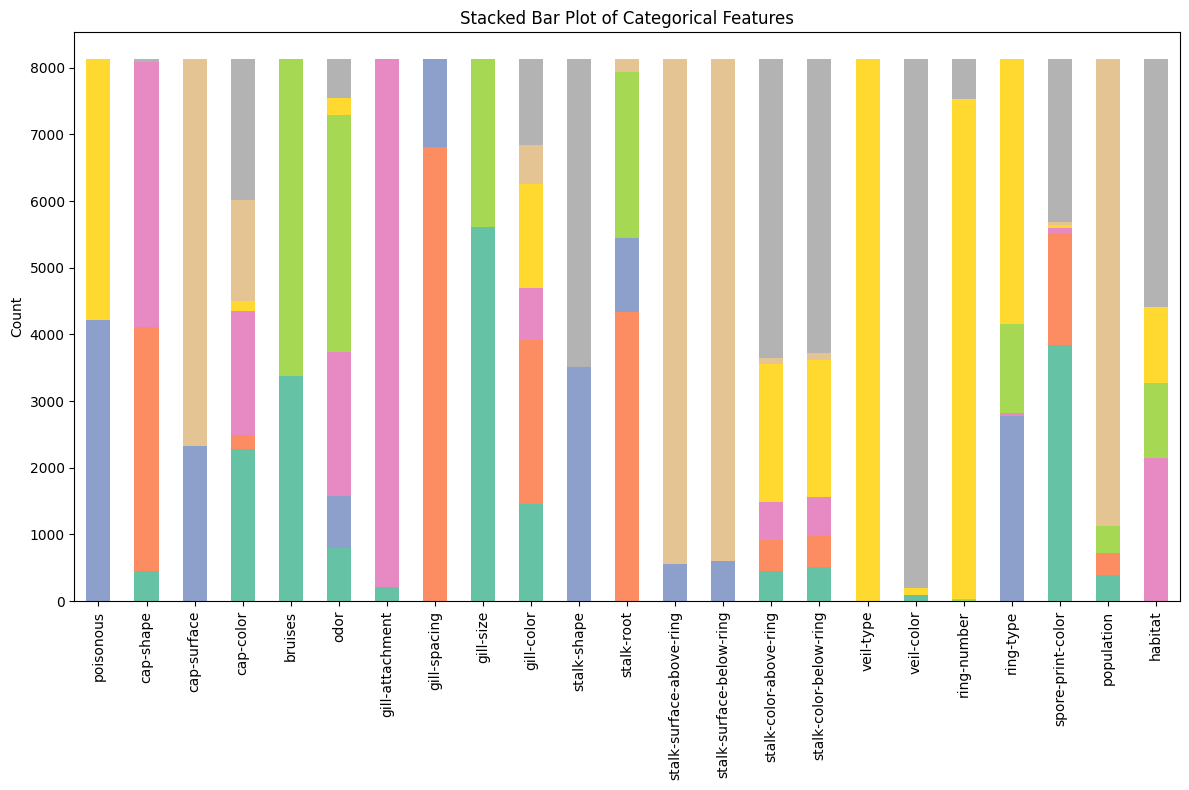

In [710]:

# Creating a stacked bar chart of every category

# Step 1: Count occurrences for each category in each feature
count_data = {}

for feature in df.columns:
    count_data[feature] = df[feature].value_counts()

# Convert the dictionary to a DataFrame 
count_data = pd.DataFrame(count_data)

# Step 2: Plot a stacked bar chart
ax = count_data.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="Set2")

# Step 3: Customize plot
plt.title('Stacked Bar Plot of Categorical Features')
# plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=90)

# The legend is automatically generated by pandas, so we can remove it to avoid clutter
ax.get_legend().remove()

# Display plot
plt.tight_layout()
plt.show()

While this chart contains no information about what the actual _values_ of the categories are, it's a great 100,000 ft view. At this point in the analysis, the particular _values_ themselves aren't worth paying too much attention to anyway. We don't need to worry yet about whether there's 1 ring on these mushrooms or 40,000. We just need to know there's only about 3 separate `ring-number` values and that almost all the mushrooms share the same value.

**Observations:**

- Roughly half of the mushrooms cataloged were `poisonous` - our prediction target is going to be true/false roughly half the time, we aren't trying to predict 1-in-a-1000 events
- Several categories were dominated by a single value, including:
  - `gill-spacing`
  - both `stalk-surface` features
  - `ring-number`
- `veil-type` is **only** ever one value - originally I thought this was a mistake but I checked the source data and it really is a single value in this column
  - We can use this conclusion to remove `veil-type` from the data. It cannot possibly be useful if every value is uniform. Signals rely on contrast.

In [711]:
# Remove the useless feature to reduce targets for further analysis
df = df.drop(columns=['veil-type'])

#### Count Plots

Somewhat of an alternative approach to the above stacked bar chart, we could instead create a series of *count plots* to show the relative frequencies of each values **and** see the values themselves. The drawback of this method is that it requires one chart per feature, which when you're working with 22 features & a target is a lot of vertical real estate on a screen. Here's two example charts.

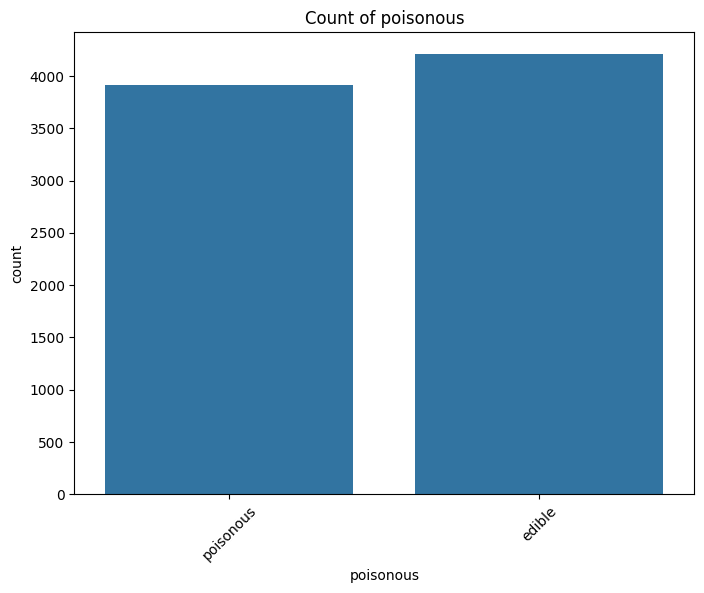

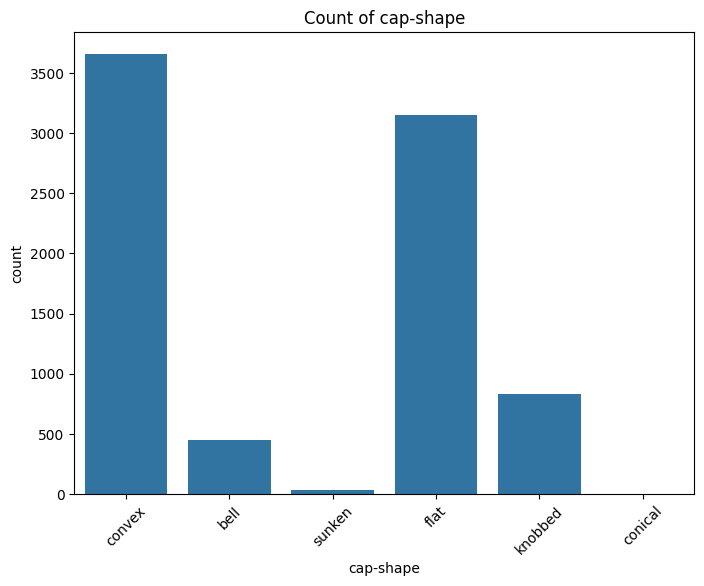

In [712]:
# Creating plot counts to show the distribution of each category

def plot_counts(df, column_name):
  """Plots a count plot for a categorical column."""
  plt.figure(figsize=(8, 6))
  sns.countplot(data=df, x=column_name)
  plt.title(f'Count of {column_name}')
  plt.xticks(rotation=45)  # Rotate x-axis labels for readability
  plt.show()

# Some selected categories to show what the plots look like
plot_counts(df, 'poisonous')
plot_counts(df, 'cap-shape')




In my mind, the ROI of showing the _textual values_ of the features at this point is not worth the investment on the part of the reader in scanning through nearly 2 dozen hypothetical charts. Thus the stacked bar chart is the better pick in my mind. Plus the stacked bar chart is more colorful, which is nice.

#### Categorical Coorelations - Grouped Bar Chart

The closest thing to pairwise charts for categorical data would be to look at how the frequency of values of each of the features changes based on the value of the target feature. In essence, what does the histogram of each feature look like for `poisonous` mushrooms and what does it look like for `edible` mushrooms. You can do this in a couple ways...

First, if you want to enumerate through the values yourself, you can construct grouped bar charts:

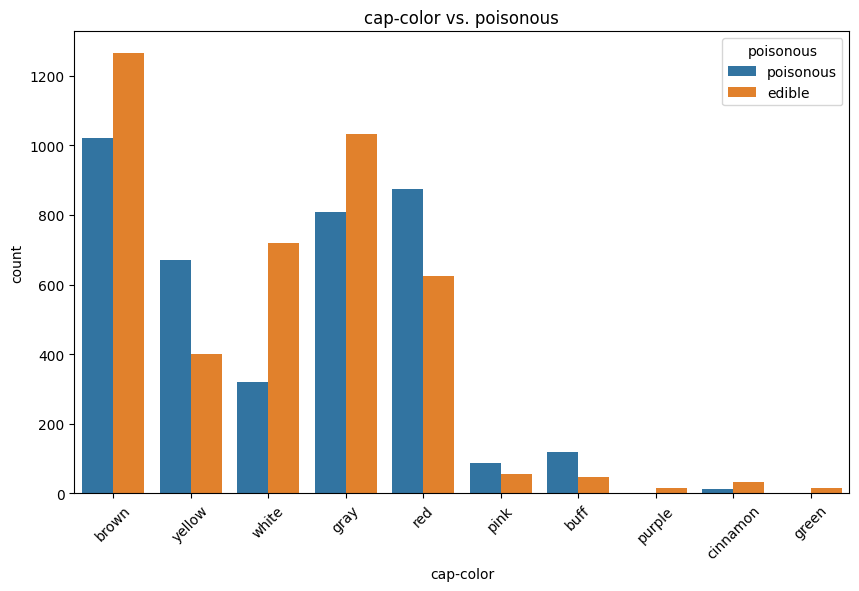

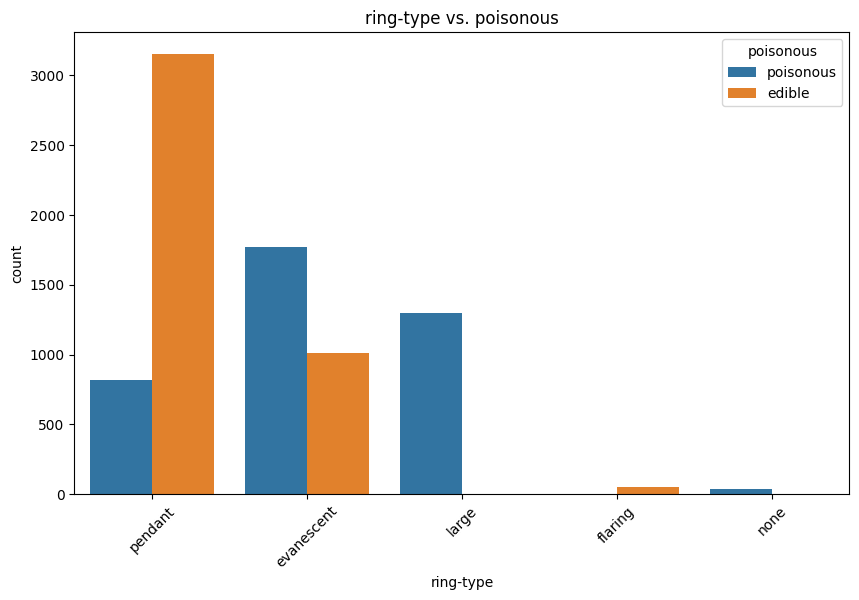

In [713]:
def plot_grouped_bars(df, col1, col2):
  """Plots a grouped bar chart for two categorical columns."""
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df, x=col1, hue=col2)
  plt.title(f'{col1} vs. {col2}')
  plt.xticks(rotation=45)
  plt.show()

# Some selected categories to show what the plots look like
plot_grouped_bars(df, 'cap-color', 'poisonous')
plot_grouped_bars(df, 'ring-type', 'poisonous')

Example observation from the above, you can already know if you're looking at a mushroom large rings - don't eat it. It's poisonous.

If you're not feeling like generating 19+ individual graphics, you can use `matplotlib`'s `subplots` feature in a loop to generate **all** comparisons.

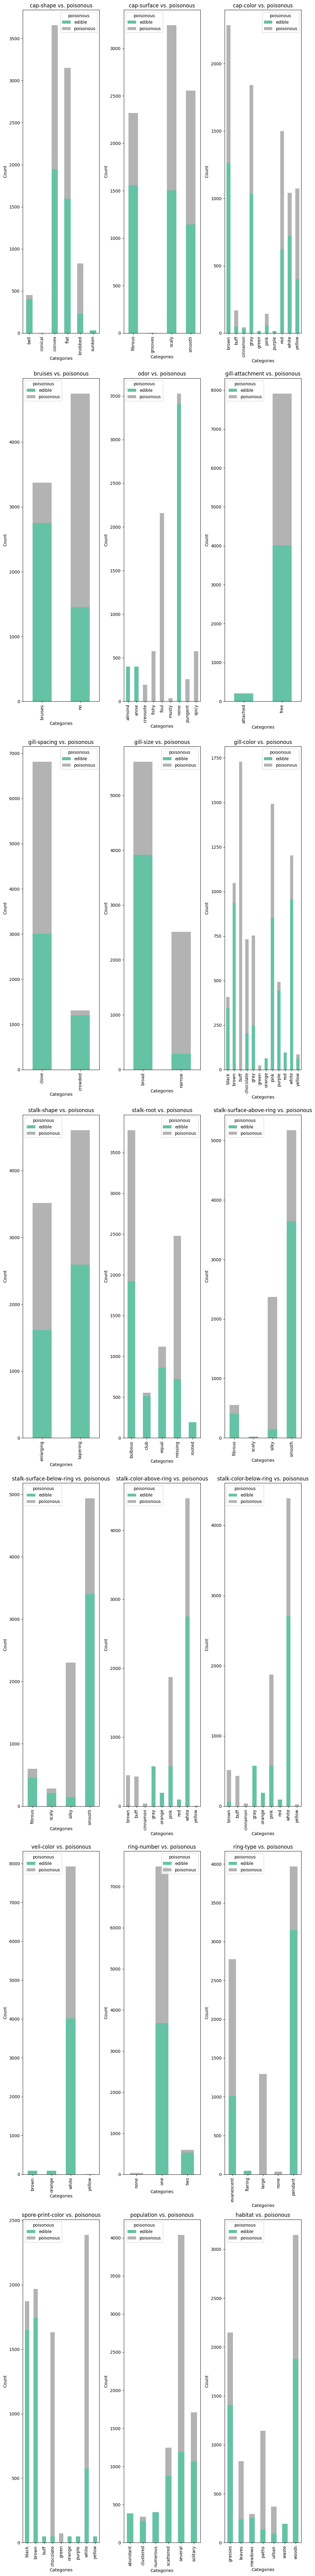

In [ ]:
# Step 1: Create a list of features to plot (excluding target)
features = [col for col in df.columns if col != 'poisonous']

# Step 2: Set up the plot
# fig, axes = plt.subplots(nrows=len(features), figsize=(10, len(features)*4)) # less compact
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(10, len(features)*4)) # more compact
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# Step 3: Plot stacked bar charts for each feature
for i, feature in enumerate(features):
    # Group by the target and get counts of each category within each feature
    cross_tab = pd.crosstab(df[feature], df['poisonous'])
    
    # Plot as stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    
    # Customize plot
    axes[i].set_title(f'{feature} vs. poisonous')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')

# Step 4: Display the plot
plt.tight_layout()
plt.show()

Scrolling through those charts, it's clear you should stay away from buff, large, mushrooms. 

More pertinant, though, is the chart for `odor` - that looks like a very promising candidate for predictive power. Features likely to lend themselves to being highly predictive as individuals will look like a row of bars that are mostly one color or the other. A row of bars that are each split exactly in half would be, by itself, not predictive at all. Although you should retain such features because it's possible they could be combined with other features to create clear signals.

### 2.2 Handle Missing Values and Clean Data

**Missing values:**

At this point we've already addressed the fact that there aren't any remediating steps we should take with regard to missing data. The only feature with some unknown values is `stalk-root`. We may consider removing the "unknown" values for models that depend on this value, but for now there's nothing we coudl replace them with (i.e. mean and median don't apply, and replacing with mode would just introduce artifacts of analytical decisions into the models).

**Data cleaning:**

We've also already done lots of data cleaning by replacing the single-letter codes with the words they represent. We could pre-produce a version of the dataframe with numerical encodings of the categorical data, but for now I'll save that until it's actually needed.

In [781]:
# Cleaning up the data already done

### 2.3 Feature Selection and Engineering

**Feature selection:**

The next step in machine learning is down-selecting to promising features, and identifying opportunities to combine features to create new ones that may be useful. 

There are 3 ways we'll approach this problem:

1. By eyeballing the stacked bar charts, looking for potentially predictive values
   - `odor`
   - both variants of `stalk-color` 
   - `bruises`
   - `gill-color`
   - `population`
2. By analyzing all the features via code
   - to be done later
3. By standing on the shoulders of giants and using the features suggested in the documentation that came with the data itself (it pays to read!)
   - `odor`
   - `spore-print-color`
   - `habitat` & `cap-color`

**Feature Engineering:**

Perhaps I'm not creative enough, but there doesn't seem to be any novel methods of combining features to create some new, meaningful feature that wouldn't simply be defined as "this plus that". For example, combining `habitat` and `cap-color` to would simply create a feature called `habitat and cap-color`, which is both arbitrary and tough to conceptualize.

There **does** need to be a conversion of all categorical data to numerical data for machine learning algorithms like _Decision Trees_ to be able to operate. So let's do that. After doing a bit of research on the best method for this, we will use **one-hot encoding** because:

```chatgpt_response
When to use: (one-hot)
Non-ordinal categorical features where there is no inherent order, and you want to preserve the information about the categories without imposing any hierarchy.

Tree-based models like decision trees, random forests, and gradient boosting trees can handle one-hot encoding well, but they may become computationally expensive if there are many categories (high cardinality).

Linear models and neural networks often work better with one-hot encoding because it avoids any misleading ordinal interpretation of categorical variables.
```

Basically, one-hot encoding translates a categorical column into **several** binary columns. For any given row, the value of the old column on that row is set to TRUE for the column that represents that value, and FALSE for the others.

In [782]:
# One-hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first to avoid multicollinearity

# Rename the poisonous column to avoid confusion
df_encoded.rename(columns={'poisonous_poisonous': 'poisonous'}, inplace=True)

# Check the encoded DataFrame
df_encoded.head()

,poisonous,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,bruises_no,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill-attachment_free,gill-spacing_crowded,gill-size_narrow,gill-color_brown,gill-color_buff,gill-color_chocolate,gill-color_gray,gill-color_green,gill-color_orange,gill-color_pink,gill-color_purple,gill-color_red,gill-color_white,gill-color_yellow,stalk-shape_tapering,stalk-root_club,stalk-root_equal,stalk-root_missing,stalk-root_rooted,stalk-surface-above-ring_scaly,stalk-surface-above-ring_silky,stalk-surface-above-ring_smooth,stalk-surface-below-ring_scaly,stalk-surface-below-ring_silky,stalk-surface-below-ring_smooth,stalk-color-above-ring_buff,stalk-color-above-ring_cinnamon,stalk-color-above-ring_gray,stalk-color-above-ring_orange,stalk-color-above-ring_pink,stalk-color-above-ring_red,stalk-color-above-ring_white,stalk-color-above-ring_yellow,stalk-color-below-ring_buff,stalk-color-below-ring_cinnamon,stalk-color-below-ring_gray,stalk-color-below-ring_orange,stalk-color-below-ring_pink,stalk-color-below-ring_red,stalk-color-below-ring_white,stalk-color-below-ring_yellow,veil-color_orange,veil-color_white,veil-color_yellow,ring-number_one,ring-number_two,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,spore-print-color_brown,spore-print-color_buff,spore-print-color_chocolate,spore-print-color_green,spore-print-color_orange,spore-print-color_purple,spore-print-color_white,spore-print-color_yellow,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
3,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,Fals

So `poisonous` = `true` means what you'd expect it to mean.

In [783]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   poisonous                        8124 non-null   bool 
 1   cap-shape_conical                8124 non-null   bool 
 2   cap-shape_convex                 8124 non-null   bool 
 3   cap-shape_flat                   8124 non-null   bool 
 4   cap-shape_knobbed                8124 non-null   bool 
 5   cap-shape_sunken                 8124 non-null   bool 
 6   cap-surface_grooves              8124 non-null   bool 
 7   cap-surface_scaly                8124 non-null   bool 
 8   cap-surface_smooth               8124 non-null   bool 
 9   cap-color_buff                   8124 non-null   bool 
 10  cap-color_cinnamon               8124 non-null   bool 
 11  cap-color_gray                   8124 non-null   bool 
 12  cap-color_green                  8124 non-null  

...and we've gone from 22 columns to 95.

### Reflection 2

**What patterns or anomalies do you see?**

> I've already pointed out all of these above, but for the sake of not leaving questions unanswered I'd say that there are numerous features that stood out, such as `odor`, as great potential candidates for training against. 

**Do any features stand out?**

> Several features stood out as good potential candidates for single-variable machine learning algorithms. Combining those with others seems like a promising approach. Another feature that stood out was `veil-type`, which was anomalous in that it only had 1 value across the whole population.

**What preprocessing steps were necessary to clean and improve the data?** 

> To make the data readable I took a few steps.
> 
> 1. Added headers
> 2. Replaced coded (single-letter) values with whole-words to start to associate real-world _meaning_ with the values. 
>
> I expect later on I may need to re-encode these variables as numbers for the classification algorithms to use.

**Did you create or modify any features to improve performance?**

> I removed the useless `veil-type` to remove clutter from future charts. Aside from that, I haven't modified the original data yet in any appreciable way.

## Section 3: Feature Selection and Justification

Here's where we would actually pick out some sets of potential inputs to train the machine learning algorithms against. In this case, our target variable is **categorical** in nature, so we will be creating a **Classifier**, rather than doing _regressions_, which are done for continuous data. 



### 3.1 Choose features & target

The Target was chosen for me: are the mushrooms `poisonous` or `edible`. It's a binary classification target.

For features, there are a number of sets I already know I'd like to analyze. However, I also plan to use code to suggest sets that might be worth considering. 

Promising features:

- `odor`
- `spore-print-color`
- `population` & `bruises`
- `stalk-color-below-ring` & `stalk-color-above-ring`
- `habitat` & `cap-color`

I plan to run several tests, for all tests `Y` will be the value of `poisonous`. `X` will be given per test, at a minimum I plan to run all 5 trials above.

In [784]:
# All cases:
y = df_encoded['poisonous']

# Case 1: odor alone
X1 = df_encoded[[col for col in df_encoded.columns if 'odor' in col]]

# Case 2: population alone
X2 = df_encoded[[col for col in df_encoded.columns if 'spore-print-color' in col]]

def filter_columns(df, keywords):
  """
  Filters columns in a DataFrame based on whether they contain any of the specified keywords.

  Args:
    df: Pandas DataFrame.
    keywords: List of strings to search for in column names.

  Returns:
    Pandas DataFrame with only the selected columns.
  """
  selected_columns = [col for col in df.columns if any(keyword in col for keyword in keywords)]
  return df[selected_columns]

# Case 3: combining population & brusies
X3 = filter_columns(df_encoded,['population', 'bruises'])

# Case 4: combining both stalk-color variants
X4 = filter_columns(df_encoded,['stalk-color-above-ring', 'stalk-color-below-ring'])

# Case 5: combining habitat & cap-color
X5 = filter_columns(df_encoded,['habitat', 'cap-color'])

# Case 6: everything  
X6 = df_encoded.drop(columns=['poisonous'])

### Reflection 3

**Why did you choose these features?**

> Again I addressed this question naturally in the course of my discussion thus far, but in the interest of colocating answers with the questions...
> I chose the set of features based on:
> 1. the distribution of colors in the stacked bar chart-by-feature
> 2. the documentation that came along with the data set
>
> ...and I plan to use code to help me choose features iteratively.

**How might they impact predictions or accuracy?**

> Any combination of features might be the key that unlocks an insight. While the above-chosen features are obvious good startigng candidates due to how they split out across `poisonous` and `edible` values, we'll be looking at a lot of combinations.


## Section 4: Train a Model

In this section we will build a method to train models based on feature selections made above. 

### 4.1 Split the Data

Here we'll split the data into **train** data and **test** data.

In [785]:
# Step 1: Perform stratified splitting to preserve the distribution of 'poisonous' in both train and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, stratify=y)


The above splits show that the training and test data splits have an even mix of poisonous and edible mushrooms. The same mix as the overall population. This reduces the likelihood of artifacting of the machine learning process to affect the results of the process.

### 4.2 Train the first Model

This will be our benchmark for comparison, the simplest model and the one that's first recommended in the documentation: `odor` alone.

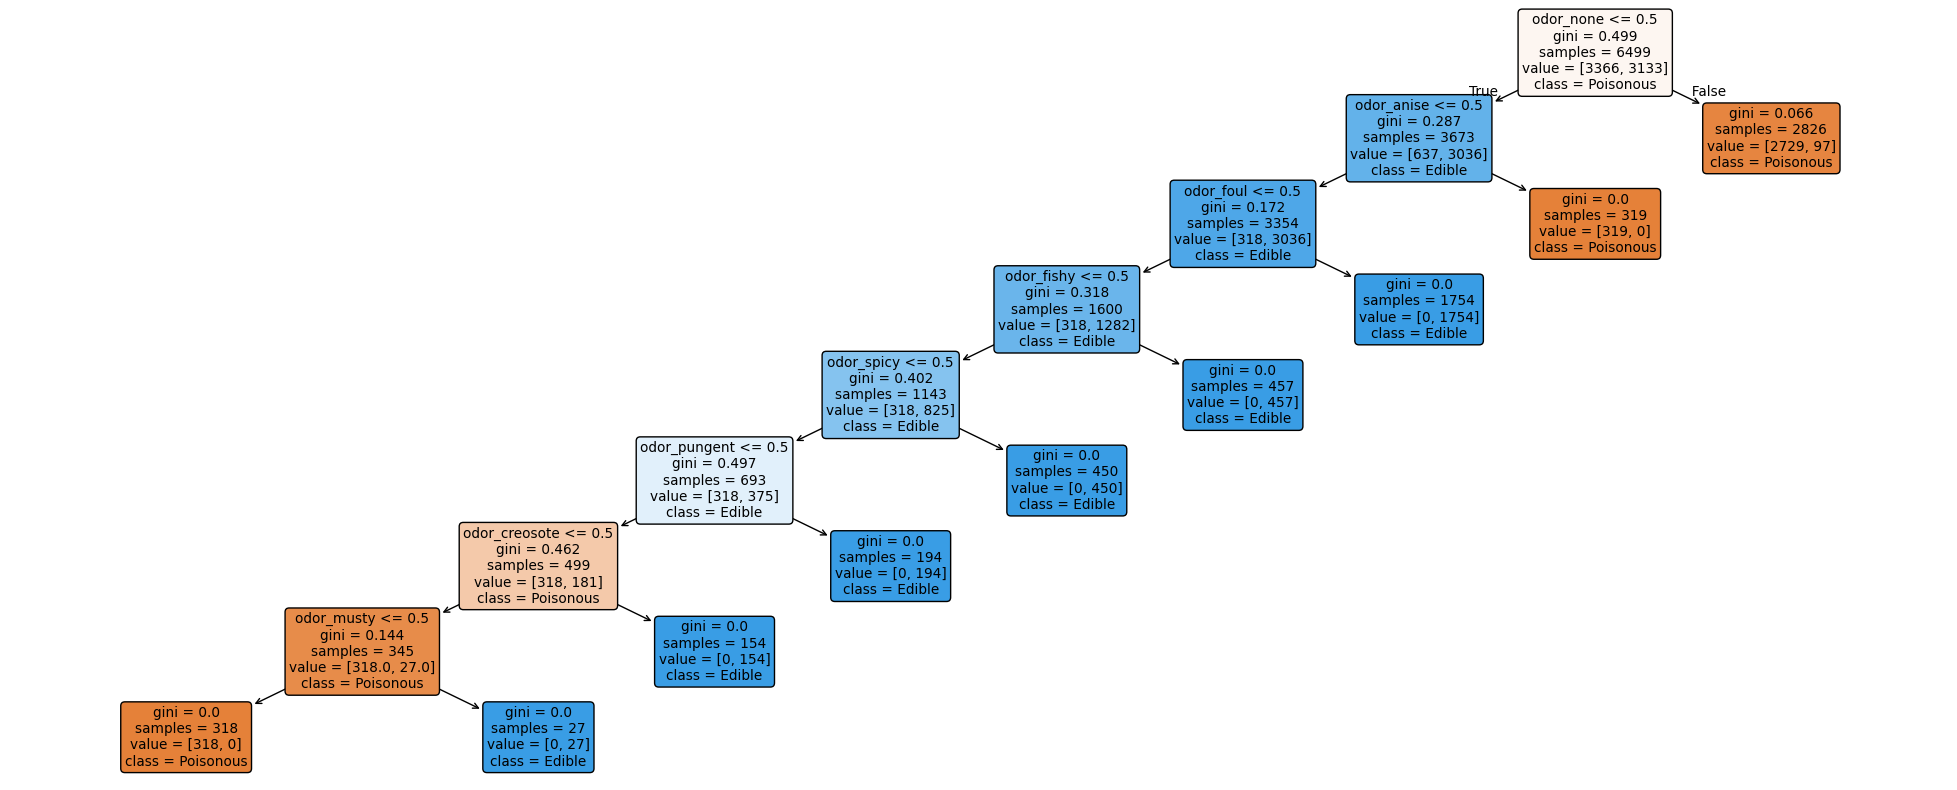

In [786]:
# Step 2: Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Step 3: Train the model
dt_model.fit(X1_train, y_train)

# Step 4: Make predictions on the test set
y_pred = dt_model.predict(X1_test)

# Show the decision tree
fig = plt.figure(figsize=(25,10))

plot_tree(dt_model, feature_names=X1.columns, class_names=['Poisonous', 'Edible'], filled=True, rounded=True) # <- works better for small trees

# plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_odorous_mushrooms.png")

### 4.3 Evaluate Performance

To evaluate the performance of binary classifiers, such as our case - where we are trying to classify the binary outcome 0 (edible) and 1 (poisonous), you can use an **Evaluation Matrix**. An evaluation matrix is a 2x2 grid, where the cells read:

| TP | FP |
| -- | -- |
| FN | TN |

- TP = True Positive
- FP = False Positive
- FN = False Negative
- TN = True Negative

Using these numbers we can calculate Accuracy, Precision, and Sensitivity.

#### Accuracy

What percent of values are correct.

`accurancy = true results / all results`

##### Precision

The percent of **positive** results that are correct.

`precision = true positives / (true & false positives)`

##### Sensitivity

The percentage of cases the model correctly identified as positive. 

`sensitivity = true positives / (true positives & false negatives)`

A test that **always returns positive** would have sensitivity of 100%. This would be highly _sensitive_, but incredibly inaccurate and thus not useful.

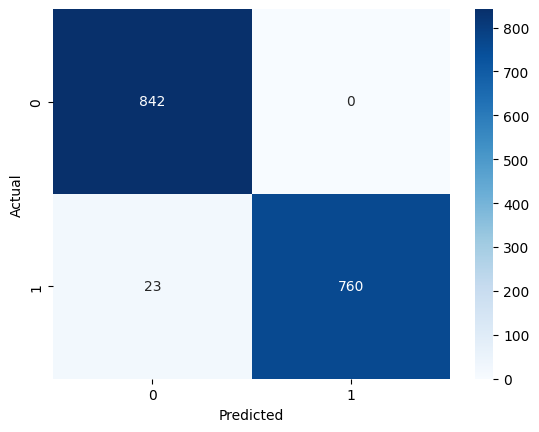

In [787]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

In [788]:

print(classification_report(y_test, y_pred, digits=3))  

              precision    recall  f1-score   support

       False      0.973     1.000     0.987       842
        True      1.000     0.971     0.985       783

    accuracy                          0.986      1625
   macro avg      0.987     0.985     0.986      1625
weighted avg      0.986     0.986     0.986      1625



This result is pretty stellar - we've **immediately** arrived at a nearly 99% accurate model. This number agrees with the suggested expectation from the documentation with the data.

### Reflection 4

**How did the model perform?**

> The model performed **very well**.
> **accuracy** = true results / all results = (842 + 760) / (842 + 0 + 23 + 760) = **0.9858**
>
> **precision** = true positives / (true & false positives) = 842 / (842 + 0) = **1.00**
>
> **sensitivity** = true positives / (true positives & false negatives) = 842 / (842 + 23) = **0.9734**
>
> I just realized **recall** is another word for **sensitivity**. Nice.
>
> Unforunately, the ~1% of cases where the model is *wrong* are **false negatives**, which given this context are probably much less preferred than **false positives**. The model will tell you the mushroom is safe 1% of the time when it's not. In this context I'd prefer a model that tells you 1% of the time that a safe mushroom isn't. Alas, this is still very good.

**Any surprises in the results?**

> At this point I'm mildly surprised I _got_ a result. The jump to one-hot encoding came with several nuances that I've wrestled with for most of the evening. The result I've arived at lines up almost exactly with what was suggested in the data documentation. So that's really cool. 

## Section 5: Improve the Model or Try Alternatives

At this point, it's going to be hard to improve the model. We've already achieved a 99% accurate model using only **one** parameter. I'd argue that a machine learning model doesn't really benefit from being _frugal_ in the same way that a human applying an algorithm would. I've already discovered by accident that it's possible to achieve a 100% accurate model by running it against all parameters. So what I'll do here is train other classifier(s) on `odor`, and try out other features aside from `odor`.

### 5.2 Train an Alternate Classifier

I'll train various support vector machines (SVM) and a neural net, to see if any of those come out better.

#### Support Vector Machine

In [789]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel='rbf')

# Linear Kernel
# svc_model = SVC(kernel='linear')

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel='poly', degree=3)

# Sigmoid Kernel
svc_model = SVC(kernel='sigmoid')

svc_model.fit(X1_train, y_train)

# execute the model on the test data
y_pred_svc = svc_model.predict(X1_test)

# Show the confusion matrix derived parameters
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc, digits=3))

Results for SVC on test data:
              precision    recall  f1-score   support

       False      0.973     1.000     0.987       842
        True      1.000     0.971     0.985       783

    accuracy                          0.986      1625
   macro avg      0.987     0.985     0.986      1625
weighted avg      0.986     0.986     0.986      1625



This is no better than the decision tree. I tried all 4 Support Vector Machine kernals. All four of them resulted in the exact same precision, sensitivity, and accuracy.

#### Neural Net

In [790]:
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X1_train, y_train) 

y_pred_nn = nn_model.predict(X1_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn, digits=3))

Results for Neural Network on test data:
              precision    recall  f1-score   support

       False      0.973     1.000     0.987       842
        True      1.000     0.971     0.985       783

    accuracy                          0.986      1625
   macro avg      0.987     0.985     0.986      1625
weighted avg      0.986     0.986     0.986      1625



Again the `odor` parameter maxes out at 98.6% accurate. It seems the limiting factor was **not** the machine learning algorithm, but instead just that there are 23 poisonous mushrooms that don't smell poisonous. No machine learning technique given ONLY smell info could pull apart these imposter-smelling poisoners.

### 5.2 Compare Performance of all Models

The Decision Tree, SVM, and Neural Net all resulted in the **same** very-high-scoring-but-not-perfect model. So, to be more interesting and live up to my promised other views we'll run the `odor` model against decison trees trained using *other* features. 

#### Trialing Other Feature Sets


In [791]:
def split_train_and_evaluate(X,name_to_use) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Step 2: Initialize the Decision Tree Classifier
    dt_model = DecisionTreeClassifier(random_state=42)

    # Step 3: Train the model
    dt_model.fit(X_train, y_train)

    # Step 4: Make predictions on the test set
    y_pred = dt_model.predict(X_test)

    result = classification_report(y_test, y_pred, digits=3, output_dict=True)
    print(f"|{name_to_use}|{result['accuracy']:.3f}|{result['macro avg']['precision']:.3f}|{result['macro avg']['recall']:.3f}|{result['macro avg']['f1-score']:.3f}|")

print(f"|Feature|Accuracy|Precision|Recall|F1-Score|")
print(f"|---|---|---|---|---|")
split_train_and_evaluate(X1,"odor")
split_train_and_evaluate(X2,"population")
split_train_and_evaluate(X3,"population & bruises")
split_train_and_evaluate(X4,"stalk-color")
split_train_and_evaluate(X5,"habitat & cap-color")
split_train_and_evaluate(X6,"everything")


|Feature|Accuracy|Precision|Recall|F1-Score|
|---|---|---|---|---|
|odor|0.986|0.987|0.985|0.986|
|population|0.863|0.863|0.864|0.863|
|population & bruises|0.868|0.873|0.865|0.867|
|stalk-color|0.767|0.774|0.764|0.764|
|habitat & cap-color|0.753|0.759|0.749|0.749|
|everything|1.000|1.000|1.000|1.000|


Copying that machine-generated markdown table into a formatted markdown block, we get a nice table comparison of the different results:

|Feature|Accuracy|Precision|Recall|F1-Score|
|---|---|---|---|---|
|odor|0.986|0.987|0.985|0.986|
|population|0.863|0.863|0.864|0.863|
|population & bruises|0.868|0.873|0.865|0.867|
|stalk-color|0.767|0.774|0.764|0.764|
|habitat & cap-color|0.753|0.759|0.749|0.749|
|everything|1.000|1.000|1.000|1.000|

### Reflection 5

**Which model performed better?**

> For Decision Trees, all tested kernals of SVM, and Neural Nets the `odor` parameter maxes out at the same 98.6% accuracy. 
>
> When it comes to the other features, none were as good as `odor`, although there were several strong candidates, such as `population`. Although, the strongest candidate of all was the model trained against **all** parameters, which was *perfectly predictive*. 

**Why or why not?**

> For the case of `odor`, it seems the limiting factor was **not** the machine learning algorithm, but instead just that there are 23 poisonous mushrooms that inherently don't smell poisonous. No machine learning technique given ONLY smell info could pull apart these imposter-smelling poisoners. 
> This is why we call them *predictions* and not *gaurantees*.
>
> For the case of a model trained on **everything**, it seems as though there's just enough data and consistency in the data to build a model capable of predicting everything in the test dataset. This 100% accuracy doesn't 100% gaurantee it would **actually be 100%** when used in the wild, though. There could always be some mutant or rogue mushroom out there that wasn't represented in the sample set. 

## Section 6: Final Thoughts & Insights

### 6.1 Summarize Findings

- A very frugal model using only `odor` is capable of being 98.5% accurate
- All the machine learning algorithms we've be exposed to arrived at the same maximum score given the `odor` input
- Given additional inputs, it was possible to create a ML model that was 100% accurate within the dataset given

### 6.2 Discuss Challenges Faced

- My chosen dataset used **all** categorical data, to convert this *nominal* categorical (i.e. not *ordinal* - there is no inherent order to the values) I used **one-hot encoding**. This was new to me and brought about a series of challenges for me to wrap my brain around. I think I get it, now. 
- Weirdly I struggled a bit because of how **good** this model was. The simplest baseline model was nearly perfect. I had to figure out alternative ways to 

### 6.3 If I Had More Time, what Would I Try Next?

- I did most of the things I wanted to do for this project. If I had more time I'd either try to spend some time trying to reverse engineer what the decision tree is telling me about how to choose edible mushrooms, OR I'd apply all of these tools and techniques to an entirely different dataset. I've got one in mind. Perhaps someday soon I'll get to do that.
- Oh also I was originally going to use code to suggest what columns I *should* pick. I actually found some great example code to do that - but then I realized I was trying to do the top 5 features out of 95. That's choose 5 from 95. There's nearly 7 BILLION ways to do that - and in order to evaluate each one it would have to do the full split, train, and evaluate cycle. I decided I like my computer to much to turn it into a molten heap. I did these calculations during the 10 minutes I let the thing chew on the code I was trying to run. My apologies to the transisitors which were horribly inconvenienced along the way.

### Reflection 6

**What did I learn from this project?**

> I learned first hand about how machine learning algorithms can produce excellent results that **cannot be explained**. While I'm reasonably confident I could spend a very long time analying the `odor` model to arrive at the same simple set of rules found in the dataset documentation, there's no easy-to-read set of takeaways anywhere in this jupiter notebook that I could actually use to learn about how to classify mushroom edibility myself. I know explainable AI is a hotly researched topic right now, and this feels like the tip of the tip of the iceberg that's being actively researched by PhDs all over the world.
>
> I learned about **one-hot encoding**, in which categorical columns are converted into _groups_ of binary columns where **one** member of the group is "**hot**" (i.e. a "1"). This works well for decision trees, SVMs, and Neural Nets. It prevents accidentally introducing artifacts into the machine, like what might happen if you mapped the different smells of a mushroom to the numbers 0, 1, 2, and 3. If you did that, the algorithm may interpret that smells mapped to 0 and 1 are more similar than smells mapped to 0 and 3 - when in reality they are arbitrarily similar or different. 
>
> I learned about **subplots** and the ability to generate one image that's comprised of many images formed as part of a loop. 
>
> I learned that I was able to intuit some good candidates for machine learning based on the stacked bar charts idea. Hooray intuition.